In [1]:
# SQLAlchemy
from sqlalchemy import create_engine

from ps_wd import pswd 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [14]:
#Create engine
engine = create_engine('postgresql://postgres:'+ pswd + '@localhost:5432/Employees_db')
connection = engine.connect()


In [3]:
# Query All Records in the salaries table
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


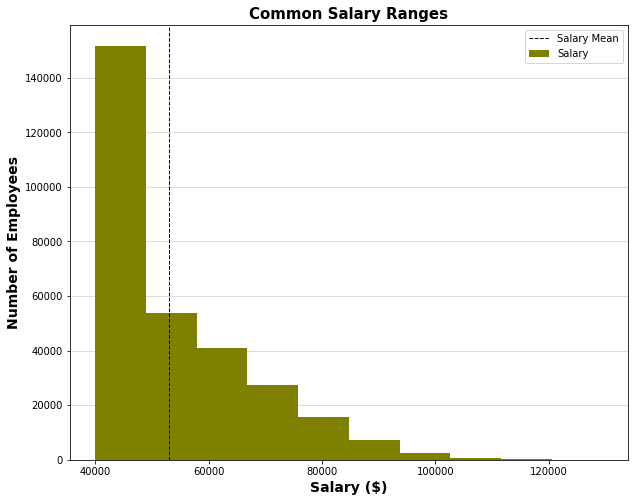

In [20]:
#Plot salary ranges
plt.figure(figsize=(10, 8))

#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')

plt.hist(salaries_df['salary'],  label="Salary", color='olive')
plt.axvline(salaries_df['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")

plt.xlabel("Salary ($)", weight='bold', fontsize=14)
plt.ylabel("Number of Employees", weight='bold', fontsize=14)
plt.legend() 
plt.title("Common Salary Ranges", weight='bold', fontsize=15)
plt.savefig("Images/Common_Salary_Ranges.png")

In [5]:
# Query All Records in the titles table
titles_df = pd.read_sql("SELECT * FROM titles", connection)

titles_df = titles_df.rename (columns={'title_id':'emp_title'})
titles_df.head()

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
# Query All Records in the employees table
employees_df = pd.read_sql("SELECT * FROM employees", connection)
employees_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [15]:
#Merge the employees and titles tables
emp_title_merge_df=pd.merge(employees_df, titles_df, on='emp_title')
emp_title_merge_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff


In [16]:
#Merge the employees-titles merged with salaries table
emptitle_salary_df=pd.merge(emp_title_merge_df, salaries_df, on="emp_no")
emptitle_salary_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


In [17]:
#Create a table of title and salary only
salary_title_df = emptitle_salary_df[['title', 'salary']]
salary_title_df.head()

,title,salary
0,Staff,40000
1,Staff,40000
2,Staff,56087
3,Staff,87084
4,Staff,63016


In [18]:
#Find the mean salary for each job title
salary_mean = salary_title_df.groupby(['title'])['salary'].mean()

salary_mean_df = salary_mean.to_frame().reset_index().sort_values('salary', ascending=False)
salary_mean_df = salary_mean_df.round(2)
salary_mean_df

,title,salary
4,Senior Staff,58550.17
5,Staff,58465.38
2,Manager,51531.04
6,Technique Leader,48582.90
0,Assistant Engineer,48564.43
1,Engineer,48535.34
3,Senior Engineer,48506.80


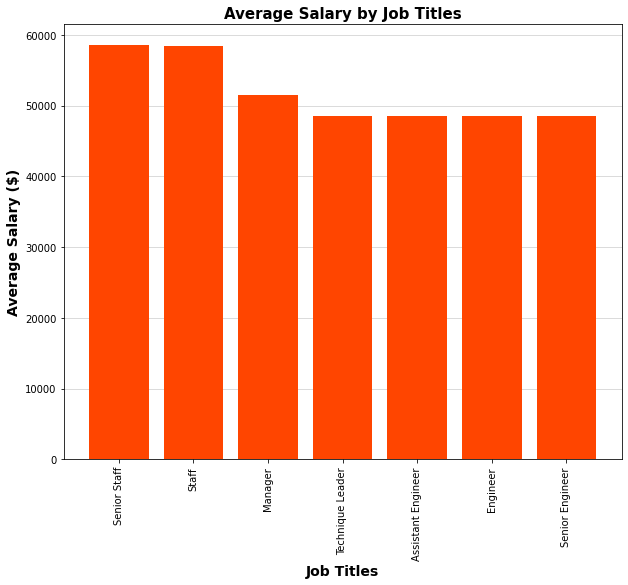

In [21]:
#Plot Avg salary v/s job titles
plt.figure(figsize=(10, 8))

#Hide grid lines behind bars
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y', color='lightgrey')

x_axis = salary_mean_df['title']
y_axis = salary_mean_df['salary']


# Create Ticks for Bar Chart's x_axis
ticks = np.arange(len(x_axis))
plt.xticks(ticks, x_axis, rotation="vertical")


plt.bar(x_axis, y_axis, align="center", color='orangered')

plt.xlabel("Job Titles", weight='bold', fontsize=14)
plt.ylabel("Average Salary ($)", weight='bold', fontsize=14)
plt.title("Average Salary by Job Titles", weight='bold', fontsize=15)
plt.savefig("Images/Average_Salary.png")

In [12]:
#Evidence in hand, you march into your boss's office and present the visualization. 
#With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, 
#"Search your ID number." You look down at your badge to see that your employee ID number is 499942.

search_ID = emptitle_salary_df.loc[emptitle_salary_df['emp_no'] == 499942]
search_ID

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title,salary
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Technique Leader,40000
